In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import constants as cs
from astropy import units as un
import sys
sys.path.insert(0, '/home/sophia/bachelor_thesis_ipython_notebooks')

from Paolo_class import GCphasespace
from GC_Orbit_class import GCorbit

%matplotlib inline

In [2]:
### import data of simulation 1 with IMBH ###
if 0:
    r_3d,m1,m2,x,y,z=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32), unpack=True)
elif 1:
    r_3d_1,m1_1,m2_1,x_1,y_1,z_1=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_IMBH1.dat', usecols=(1,9,10,30,31,32), unpack=True)
else:
    r_3d,m1,m2,x,y,z=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32), unpack=True)

In [3]:
### import data of simulation 2 with IMBH ###
if 0:
    r_3d,m1,m2,x,y,z=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32), unpack=True)
elif 1:
    r_3d_2,m1_2,m2_2,x_2,y_2,z_2=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_IMBH2.dat', usecols=(1,9,10,30,31,32), unpack=True)
else:
    r_3d,m1,m2,x,y,z=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32), unpack=True)

In [4]:
### import data for simulation 1 w/o IMBH ###
if 0:
    r_3d_wo,m1_wo,m2_wo,x_wo,y_wo,z_wo,vx_wo,vy_wo,vz_wo=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
elif 1:
    r_3d_wo_1,m1_wo_1,m2_wo_1,x_wo_1,y_wo_1,z_wo_1=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_noIMBH1.dat', usecols=(1,9,10,29,30,31), unpack=True)
else:
    r_3d,m1,m2,x,y,z,vx,vy,vz=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)

In [7]:
### import data for simulation 2 w/o IMBH ###
if 0:
    r_3d_wo,m1_wo,m2_wo,x_wo,y_wo,z_wo,vx_wo,vy_wo,vz_wo=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
elif 1:
    r_3d_wo_2,m1_wo_2,m2_wo_2,x_wo_2,y_wo_2,z_wo_2=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_noIMBH2.dat', usecols=(1,9,10,30,31,32), unpack=True)
else:
    r_3d,m1,m2,x,y,z,vx,vy,vz=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)

In [6]:
### initialize phasespace objects ###
wobh_1=GCphasespace(r_3d_wo_1,bin_num=20)
bh_1=GCphasespace(r_3d_1,bin_num=20)
wobh_2=GCphasespace(r_3d_wo_2,bin_num=20)
bh_2=GCphasespace(r_3d_2,bin_num=20)


In [18]:
### load half light and half mass radii for both simulations ###
hmr_bh_1,hmr_bh_2,hlr_bh_1,hlr_bh_2,hmr_wo_bh_1,hmr_wo_bh_2,hlr_wo_1,hlr_wo_2=np.loadtxt('half_mass_and_half_light_radius')

In [15]:
### take IMBH out of data 1###
mges_1=np.sum(m1_1+m2_1)
r3d0_1=r_3d_1[0]
m10_1=m1_1[0]
m20_1=m2_1[0]
x0_1=x_1[0]
y0_1=y_1[0]
z0_1=z_1[0]

r_3d_crop_1=r_3d_1[1:]
m1_crop_1=m1_1[1:]
m2_crop_1=m2_1[1:]
x_crop_1=x_1[1:]
y_crop_1=y_1[1:]
z_crop_1=z_1[1:]

In [14]:
### take IMBH out of data 2###
mges_2=np.sum(m1_2+m2_2)
r3d0_2=r_3d_2[0]
m10_2=m1_2[0]
m20_2=m2_2[0]
x0_2=x_2[0]
y0_2=y_2[0]
z0_2=z_2[0]

r_3d_crop_2=r_3d_2[1:]
m1_crop_2=m1_2[1:]
m2_crop_2=m2_2[1:]
x_crop_2=x_2[1:]
y_crop_2=y_2[1:]
z_crop_2=z_2[1:]

In [16]:
### calculate mean density and its mean radius and save them ###
r_dens_bh_1,dens_bh_1=bh_1.density(r_3d_crop_1,m1_crop_1,m2_crop_1,r_3d_crop_1[300],np.max(r_3d_crop_1),step=20) 
r_dens_bh_2,dens_bh_2=bh_2.density(r_3d_crop_2,m1_crop_2,m2_crop_2,r_3d_crop_2[300],np.max(r_3d_crop_2),step=20) 
r_dens_wobh_1,dens_wobh_1=wobh_1.density(r_3d_wo_1,m1_wo_1,m2_wo_1,r_3d_wo_1[300],np.max(r_3d_wo_1),step=20) 
r_dens_wobh_2,dens_wobh_2=wobh_2.density(r_3d_wo_2,m1_wo_2,m2_wo_2,r_3d_wo_2[300],np.max(r_3d_wo_2),step=20) 

np.savetxt('densityfile_IMBH1.txt',(r_dens_bh_1,dens_bh_1))
np.savetxt('densityfile_IMBH2.txt',(r_dens_bh_2,dens_bh_2))
np.savetxt('densityfile_noIMBH1.txt',(r_dens_wobh_1,dens_wobh_1))
np.savetxt('densityfile_noIMBH2.txt',(r_dens_wobh_2,dens_wobh_2))


In [19]:
### calculate distance over effective radius ###
r_plot_bh_1=r_dens_bh_1/hmr_bh_1
r_plot_bh_2=r_dens_bh_2/hmr_bh_2
r_plot_wobh_1= r_dens_wobh_1/hmr_wo_bh_1
r_plot_wobh_2= r_dens_wobh_2/hmr_wo_bh_2

In [20]:
### initialize orbit objects ###
orb_bh_1=GCorbit(inputfilename='densityfile_IMBH1.txt',bhmass_M_sun=m10_1+m20_1)
orb_bh_2=GCorbit(inputfilename='densityfile_IMBH2.txt',bhmass_M_sun=m10_2+m20_2)
orb_wobh_1=GCorbit(inputfilename='densityfile_noIMBH1.txt')
orb_wobh_2=GCorbit(inputfilename='densityfile_noIMBH2.txt')

/home/sophia/bachelor_thesis_ipython_notebooks/GC_Orbit_class.py:68: RuntimeWarning: overflow encountered in exp
  density= np.exp(self.s(np.log(r)))


In [21]:
### interpolate density ###
intpol_dens_bh_1=orb_bh_1.density(r_3d_crop_1)
intpol_dens_bh_2=orb_bh_2.density(r_3d_crop_2)
intpol_dens_wobh_1=orb_wobh_1.density(r_3d_wo_1)
intpol_dens_wobh_2=orb_wobh_2.density(r_3d_wo_2)

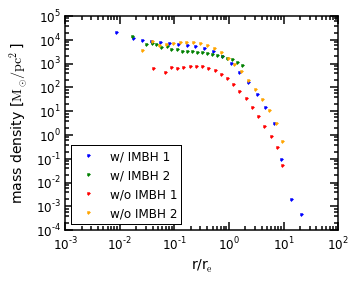

In [22]:
### plot both densities over r over effective radius ###
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_subplot(111)
#ax2 = ax1.twiny()

ax1.loglog(r_plot_bh_1,dens_bh_1,'b.',label='w/ IMBH 1')
ax1.loglog(r_plot_bh_2,dens_bh_2,'g.',label='w/ IMBH 2')
ax1.loglog(r_plot_wobh_1,dens_wobh_1,'r.', label='w/o IMBH 1')
ax1.loglog(r_plot_wobh_2,dens_wobh_2,'.',color='orange', label='w/o IMBH 2')
ax1.legend(loc=0,numpoints=1)

#ax1.set_xlim(0.01,100)
#ax1.set_ylim(0.00001,1000000)
ax1.set_xlabel('r/r$_\mathrm{e}$',fontsize=14)
ax1.set_ylabel('mass density [$\mathrm{M}_\odot/\mathrm{pc}^2$]',fontsize=14)

#ax2.set_xlim((0.01/5000)*360*3600/(2*np.pi),(100./5000)*360*3600/(2*np.pi)) #calculates x limits from parsec to arcsec
#ax2.set_xscale('log')
#ax2.set_xlabel('mean distance from center [arcsec]',fontsize=14)

#fig.savefig('3d density profile numerical fit without imbh')
ax1.spines['top'].set_linewidth(1.5)
ax1.spines['right'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['left'].set_linewidth(1.5)

ax1.tick_params(length=8,width=1.5,labelsize=12)
#ax2.tick_params(length=8,width=1.5,labelsize=12)
ax1.tick_params(which='minor',length=4,width=1.5)
#ax2.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()

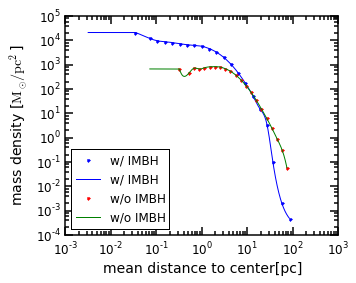

In [12]:
### plot both densities and interpolations over r ###
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_subplot(111)
#ax2 = ax1.twiny()

ax1.loglog(r_dens_bh,dens_bh,'b.',r_3d,intpol_dens_bh,label='w/ IMBH')
ax1.loglog(r_dens_wobh,dens_wobh,'r.',r_3d_wo,intpol_dens_wobh, label='w/o IMBH')
ax1.legend(loc=0,numpoints=1)

#ax1.set_xlim(0.01,100)
#ax1.set_ylim(0.00001,1000000)
ax1.set_xlabel('mean distance to center[pc]',fontsize=14)
ax1.set_ylabel('mass density [$\mathrm{M}_\odot/\mathrm{pc}^2$]',fontsize=14)

#ax2.set_xlim((0.01/5000)*360*3600/(2*np.pi),(100./5000)*360*3600/(2*np.pi)) #calculates x limits from parsec to arcsec
#ax2.set_xscale('log')
#ax2.set_xlabel('mean distance from center [arcsec]',fontsize=14)

#fig.savefig('3d density profile numerical fit without imbh')
ax1.spines['top'].set_linewidth(1.5)
ax1.spines['right'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['left'].set_linewidth(1.5)

ax1.tick_params(length=8,width=1.5,labelsize=12)
#ax2.tick_params(length=8,width=1.5,labelsize=12)
ax1.tick_params(which='minor',length=4,width=1.5)
#ax2.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()